# 4. Análisis exploratorio de datos

Nos han otorgado información adicional de dos CSV:

**`project_sql_result_01.csv`**

- **company_name:** nombre de la empresa de taxis

- **trips_amount:** el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017. 

**`project_sql_result_04.csv`**

- **dropoff_location_name:** barrios de Chicago donde finalizaron los viajes

- **average_trips:** el promedio de viajes que terminaron en cada barrio en noviembre de 2017.

## 4.1 Importar librerías y archivos

In [1]:
#Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [2]:
# Cargar los archivos CSV
df_01 = pd.read_csv('moved_project_sql_result_01.csv')
df_04 = pd.read_csv('moved_project_sql_result_04.csv')

# Mostrar las primeras filas de los DataFrames
print(df_01.head())
print()
print(df_04.head())

                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                 Medallion Leasin         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000


## 4.2 Estudiar contenido de las bases de datos

In [3]:
# Mostrar información de los DataFrames
print(df_01.info())
print()
print(df_04.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None


In [4]:
# Verificar existencia de valores nulos
df_01.isna().sum()

company_name    0
trips_amount    0
dtype: int64

In [5]:
# Verificar existencia de valores nulos
df_04.isna().sum()

dropoff_location_name    0
average_trips            0
dtype: int64

Observamos que los datos estan definidos correctamente y **no existen valores nulos** en ambos DataFrames.

In [6]:
# Mostrar variables estadísticas 
df_01.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [7]:
df_04.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


Observamos que en ambos casos la media se encuentra distante de la mediana, con una gran desviación estandar lo que nos indica que los datos no presentan una distribución normal.

In [8]:
# Verificar existencia de duplicados 
df_01.duplicated().sum()

0

In [9]:
# Verificar existencia de duplicados 
df_04.duplicated().sum()

0

En ambos DataFrames verificamos que **NO** existen registros **duplicados**.

## 4.3 Identificar los 10 principales barrios en términos de finalización del recorrido

In [10]:
# Ordenar por average_trips y seleccionar los 10 principales barrios
top_10_neighborhoods = df_04.sort_values(by='average_trips', ascending=False).head(10)

print("Top 10 barrios por promedio de finalización de viajes en noviembre de 2017:")
print(top_10_neighborhoods.round(2))

Top 10 barrios por promedio de finalización de viajes en noviembre de 2017:
  dropoff_location_name  average_trips
0                  Loop       10727.47
1           River North        9523.67
2         Streeterville        6664.67
3             West Loop        5163.67
4                O'Hare        2546.90
5             Lake View        2420.97
6            Grant Park        2068.53
7         Museum Campus        1510.00
8            Gold Coast        1364.23
9    Sheffield & DePaul        1259.77


## 4.4 Graficar: empresas de taxis y número de viajes, los 10 barrios principales por número de finalizaciones

Se aplicará un filtro para la cantidad de viajes, para seleccionar solo aquellas compañías de taxis que tienen más de 2000 viajes en los días 15 y 16 de noviembre de 2017. Las razones son las siguientes:

* __Claridad visual__: Al excluir las compañías con menos de 2000 viajes, el gráfico se vuelve más claro y fácil de interpretar, evitando la sobrecarga de información.

* __Comparabilidad__: Facilita la comparación entre las principales compañías de taxis que tienen un impacto significativo en el mercado, proporcionando información más útil y accionable.

* __Eliminación de ruido__: Compañías con muy pocos viajes pueden no ser representativas del mercado general y pueden añadir ruido al análisis, afectando la interpretación de los datos.

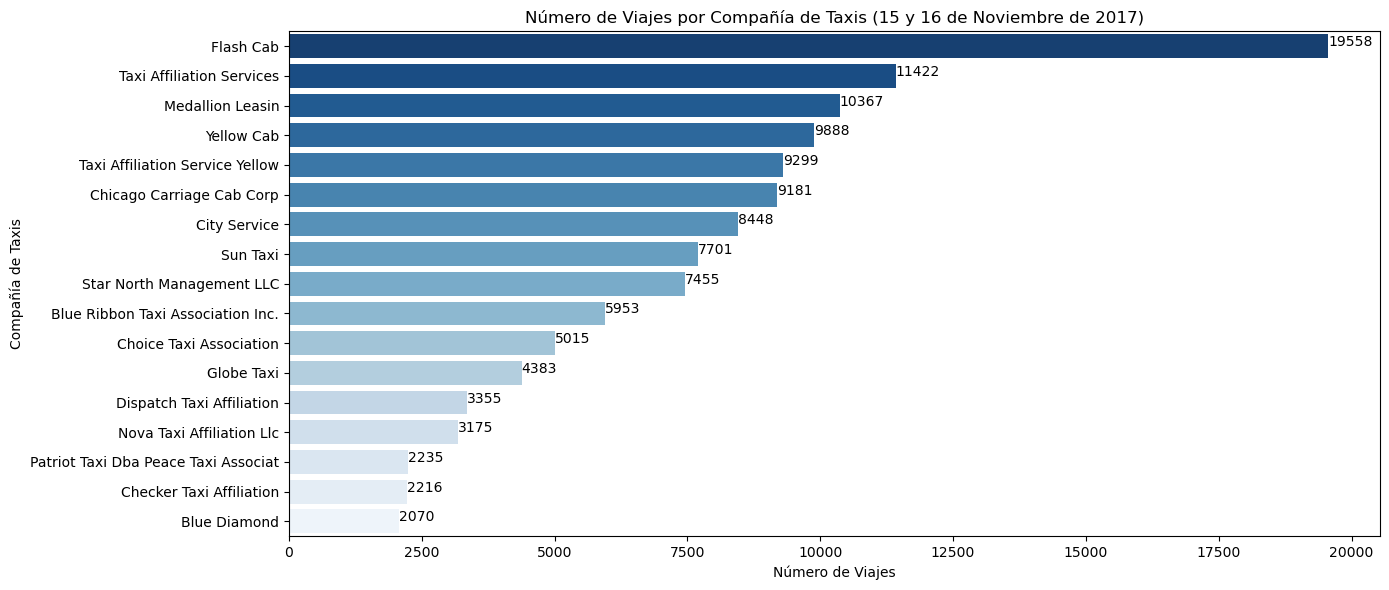

In [11]:
# Filtrar los datos para incluir solo compañías con trips_amount mayor a 2500
df_filtered = df_01[df_01['trips_amount'] > 2000]

# Crear el gráfico de barras usando Seaborn
plt.figure(figsize=(14, 6))
barplot = sns.barplot(y='company_name', x='trips_amount', data=df_filtered, palette='Blues_r')

# Mostrar etiquetas de datos
for index, value in enumerate(df_filtered['trips_amount']):
    plt.text(value, index, f'{value}', color='black', ha='left')

plt.xlabel('Número de Viajes')
plt.ylabel('Compañía de Taxis')
plt.title('Número de Viajes por Compañía de Taxis (15 y 16 de Noviembre de 2017)')
plt.tight_layout()
plt.show()

* __Flash Cab es líder absoluto__: Realiza significativamente más viajes que cualquier otra compañía. Esto puede indicar una mayor flota, mejor servicio, o una mayor reputación entre los clientes.
<br>

* __Taxi Affiliation Services y Medallion Leasin en segundo y tercer lugar__: Estas compañías también realizan un número considerable de viajes. Esto sugiere que también son populares y tienen una presencia significativa en el mercado.
<br>

* __Distribución desigual__: Hay una gran diferencia entre las compañías líderes y las de menor desempeño. Las compañías con menos de 5,000 viajes tienen una brecha notable con las líderes, indicando posibles diferencias en capacidad operativa, calidad del servicio, o marketing.
<br>

* __Competencia variada__: Varias compañías tienen un número intermedio de viajes (entre 5,000 y 10,000), lo que muestra que el mercado de taxis en Chicago es competitivo y no está monopolizado por una sola entidad.

En resumen, el gráfico muestra que el mercado de taxis en Chicago está dominado por unas pocas compañías grandes, con una larga cola de compañías más pequeñas que podrían beneficiarse de mejorar su presencia y operaciones.

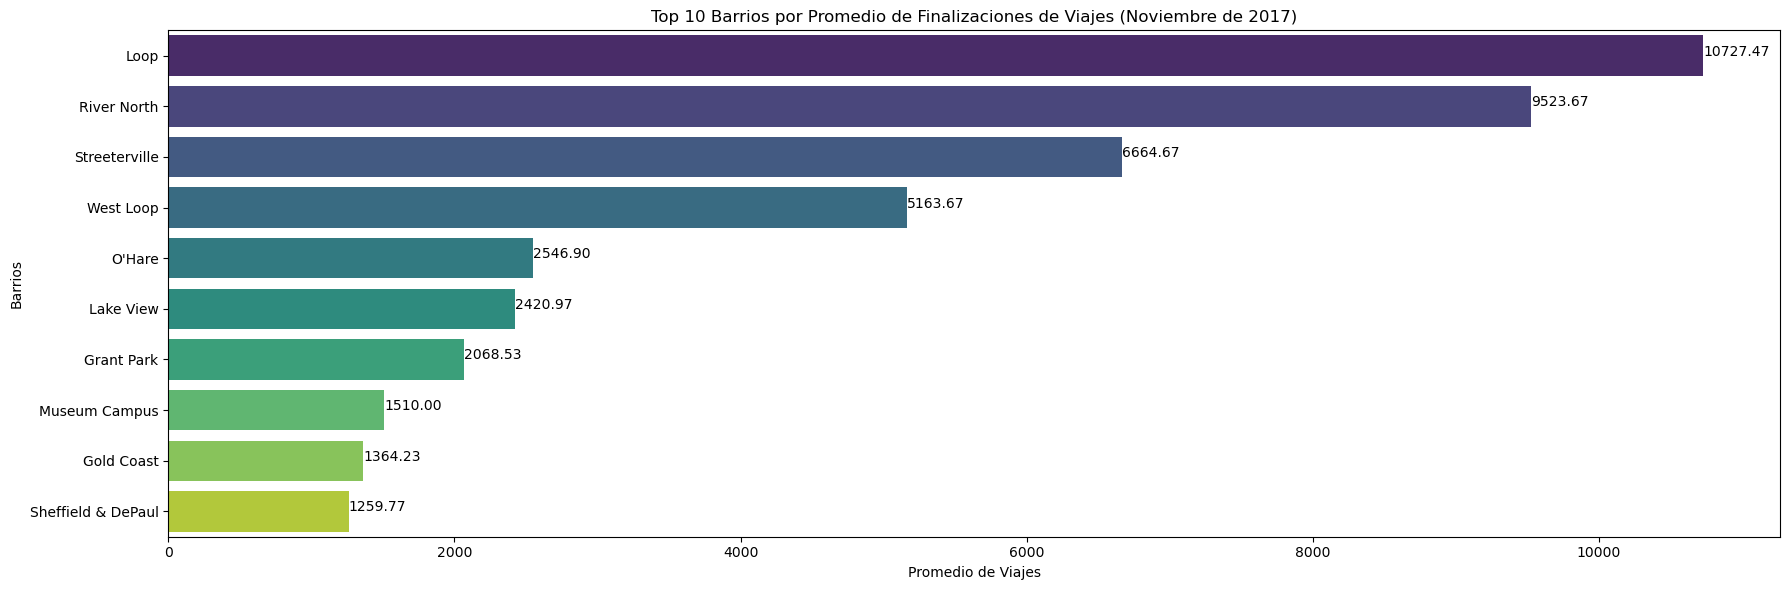

In [12]:
# Gráfico de los 10 principales barrios por número de finalizaciones
plt.figure(figsize=(18, 6))
barplot = sns.barplot(y='dropoff_location_name', x='average_trips', data=top_10_neighborhoods, palette='viridis')

# Añadir etiquetas de datos
for index, value in enumerate(top_10_neighborhoods['average_trips']):
    plt.text(value, index, f'{value:.2f}', color='black', ha='left')

plt.xlabel('Promedio de Viajes')
plt.ylabel('Barrios')
plt.title('Top 10 Barrios por Promedio de Finalizaciones de Viajes (Noviembre de 2017)')
plt.tight_layout()
plt.show()

* __Loop domina las finalizaciones__: El barrio Loop tiene el promedio más alto de finalizaciones en noviembre de 2017. Esto puede deberse a su centralidad y a ser un importante centro de negocios y turismo en Chicago. River North y Streeterville también son populares.
<br>

* __Contribución significativa de West Loop y O'Hare__: West Loop y O'Hare también muestran altos promedios de finalización, reflejando su importancia en términos de actividades comerciales y acceso al aeropuerto.
<br>

* __Distribución variada en otros barrios__: Barrios como Lake View, Grant Park, Museum Campus, Gold Coast y Sheffield & DePaul tienen una menor cantidad de finalizaciones en comparación con los líderes, pero aún representan zonas de alta actividad.
<br>

* __Importancia de los centros comerciales y turísticos__: Muchos de los barrios destacados en el gráfico son centros comerciales o turísticos importantes, lo que explica la alta cantidad de finalizaciones de viajes en estas áreas.

# 5. Prueba de hipótesis

## 5.1 Importar los datos

In [13]:
# Cargar el archivo CSV
df_07 = pd.read_csv('moved_project_sql_result_07.csv')

# Mostrar las primeras filas del DataFrame
print("Datos del archivo project_sql_result_07.csv:")
print(df_07.head())

Datos del archivo project_sql_result_07.csv:
              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0


In [14]:
# Mostrar información del DataFrame
print(df_07.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB
None


## 5.2 Plantear las hipótesis

* __Hipótesis nula (H0)__: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare no cambia en los sábados lluviosos.
<br>
<br>
* __Hipótesis alternativa (H1)__: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia en los sábados lluviosos.

**Razón para este planteamiento:**

* __Hipótesis nula (H0)__: Plantea que no hay un efecto significativo de las condiciones climáticas sobre la duración de los viajes. Es la suposición de que cualquier diferencia observada es producto del azar.

* __Hipótesis alternativa (H1)__: Plantea que sí hay un efecto significativo de las condiciones climáticas sobre la duración de los viajes. Es lo contrario a la hipótesis nula y busca demostrar que existe una diferencia significativa.

## 5.3 Filtrar y agrupar los datos

Observamos que los datos de la columna 'start_ts' estan en formato object por lo que se convertiran los datos a tipo datetime. Por otro lado, se filtraran los viajes en función del estado del clima 'lluvioso' o 'no lluvioso'.

In [15]:
# Convertir la columna start_ts a datetime
df_07['start_ts'] = pd.to_datetime(df_07['start_ts'])

# Filtrar los viajes en sábados lluviosos
rainy_saturdays = df_07[(df_07['weather_conditions'] == 'Bad') & (df_07['start_ts'].dt.dayofweek == 5)]

# Filtrar los viajes en sábados no lluviosos
good_saturdays = df_07[(df_07['weather_conditions'] == 'Good') & (df_07['start_ts'].dt.dayofweek == 5)]

# Calcular la duración promedio de los viajes
mean_rainy_saturdays = rainy_saturdays['duration_seconds'].mean()/60
mean_good_saturdays = good_saturdays['duration_seconds'].mean()/60

print(f"Duración promedio en sábados lluviosos: {mean_rainy_saturdays:.2f} minutos")
print(f"Duración promedio en sábados no lluviosos: {mean_good_saturdays:.2f} minutos")

Duración promedio en sábados lluviosos: 40.45 minutos
Duración promedio en sábados no lluviosos: 33.33 minutos


**Explicación**

* __Criterio de prueba__: Utilizaremos la prueba __t Student__ para comparar las **medias de dos muestras independientes** porque estamos evaluando si hay una diferencia significativa en las medias de dos grupos.
<br>
<br>
* __Criterio de conclusiones__: Dependiendo del valor p y el nivel de significancia establecido (alfa), determinaremos si rechazar o no la hipótesis nula. Esta conclusión nos permitirá saber si la duración promedio de los viajes cambia en los sábados lluviosos.

In [16]:
# Realizar la prueba t
t_stat, p_value = ttest_ind(rainy_saturdays['duration_seconds'], good_saturdays['duration_seconds'], equal_var=False)

# Definir el nivel de significancia (alfa)
alpha = 0.05

print(f"t-statistic: {t_stat:.2f}")
print(f"p-value: {p_value}")

# Decisión basada en el p-valor
if p_value < alpha:
    print("Rechazamos la hipótesis nula (H0)")
else:
    print("No podemos rechazar la hipótesis nula (H0)")

t-statistic: 7.19
p-value: 6.738994326108734e-12
Rechazamos la hipótesis nula (H0)


**Interpretación:**

* __t-statistic__: La t-statistic es una medida de la diferencia entre los dos grupos en términos de desviación estándar. Un valor alto indica una diferencia significativa entre los grupos.
<br>

* __p-value__: El p-valor nos dice la probabilidad de obtener los resultados observados si la hipótesis nula es verdadera. En este caso, el p-valor es 6.74e-12, que es muy pequeño y mucho menor que el nivel de significancia (0.05).

Dado que el **p-valor (6.74e-12) es mucho menor que el nivel de significancia (0.05), rechazamos la hipótesis nula (H0)**. Esto significa que hay una diferencia significativa en la duración promedio de los viajes en sábados lluviosos en comparación con los sábados no lluviosos.

La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia significativamente en los sábados lluviosos. Este resultado sugiere que las condiciones climáticas adversas, como la lluvia, tienen un impacto significativo en la duración de los viajes en taxi, posiblemente debido a factores como el aumento del tráfico y las condiciones de manejo más difíciles.

## 6. Conclusiones

#### Análisis de Datos de Taxis
* **Empresas Líderes:** 
   - **Flash Cab** lidera con una cantidad significativa de viajes.
   - **Taxi Affiliation Services** y **Medallion Leasing** también tienen una participación importante.
   - La distribución desigual sugiere que las empresas más pequeñas tienen oportunidades para crecer.
<br>
<br>
* **Barrios Principales:**
   - **Loop, River North y Streeterville** son los barrios con mayor promedio de finalizaciones de viajes.
   - Estos barrios son centros comerciales y turísticos clave, explicando la alta demanda de taxis.

#### Prueba de Hipótesis

* **Impacto del Clima:**
   - La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia significativamente en los sábados lluviosos.
   - Condiciones climáticas adversas aumentan los tiempos de viaje debido a tráfico y dificultades de manejo.

#### Recomendaciones para Optimización
* **Mejora de Infraestructura:**
   - Implementar sistemas de gestión de tráfico inteligentes y carriles dedicados para taxis.
* **Uso de Tecnología:**
   - Equipar taxis con sistemas de navegación avanzados y aplicaciones móviles.
* **Capacitación y Coordinación:**
   - Capacitar a los conductores para manejar en condiciones climáticas adversas y coordinar mejor los horarios de recogida y entrega.

### Resumen
El análisis detallado del mercado de taxis en Chicago revela las principales compañías y barrios en términos de demanda, y demuestra el impacto significativo del clima en los tiempos de viaje. Las recomendaciones proporcionadas pueden mejorar la eficiencia y satisfacción del cliente, especialmente en condiciones climáticas adversas.